In [1]:
%matplotlib inline
from IPython.display import display, HTML
from analysis import Analysis
from models import *
analysis = Analysis('weather', normalize=True, logger=display)
analysis.load_data()

//anaconda/envs/python35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Now setting the predictor to be the avg temperature value.

The features will be the year, month, and day of the current observation.

In [2]:
predictor = 'actual_mean_temp'
analysis.data['year'] = analysis.data['date'].dt.year
analysis.data['month'] = analysis.data['date'].dt.month
analysis.data['day'] = analysis.data['date'].dt.day
features = ['year', 'month', 'day']
analysis.set_feature_predictor_columns(features, predictor)
analysis.train_test_split()

'Number of train data points: 292'

'Number of test data points: 73'

Set some parameters that are used by some of the models

In [3]:
# The number of days to chunk inputs by
NUM_DAYS = 5

# 
NUM_FEATURES = len(analysis.features)

Going to try each different model.

ARIMA

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1833.114, BIC=1862.528, Fit time=1.687 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1968.273, BIC=1994.010, Fit time=1.034 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1869.725, BIC=1895.462, Fit time=0.858 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1835.805, BIC=1868.896, Fit time=1.918 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1990.656, BIC=2016.393, Fit time=0.587 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=0.297 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1838.599, BIC=1875.367, Fit time=4.716 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1816.110, BIC=1849.201, Fit time=1.660 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1

'Train Error: 5.27151057192  Num NaN: 0'

'Test Error: 6.76020503216    Num NaN: 0'

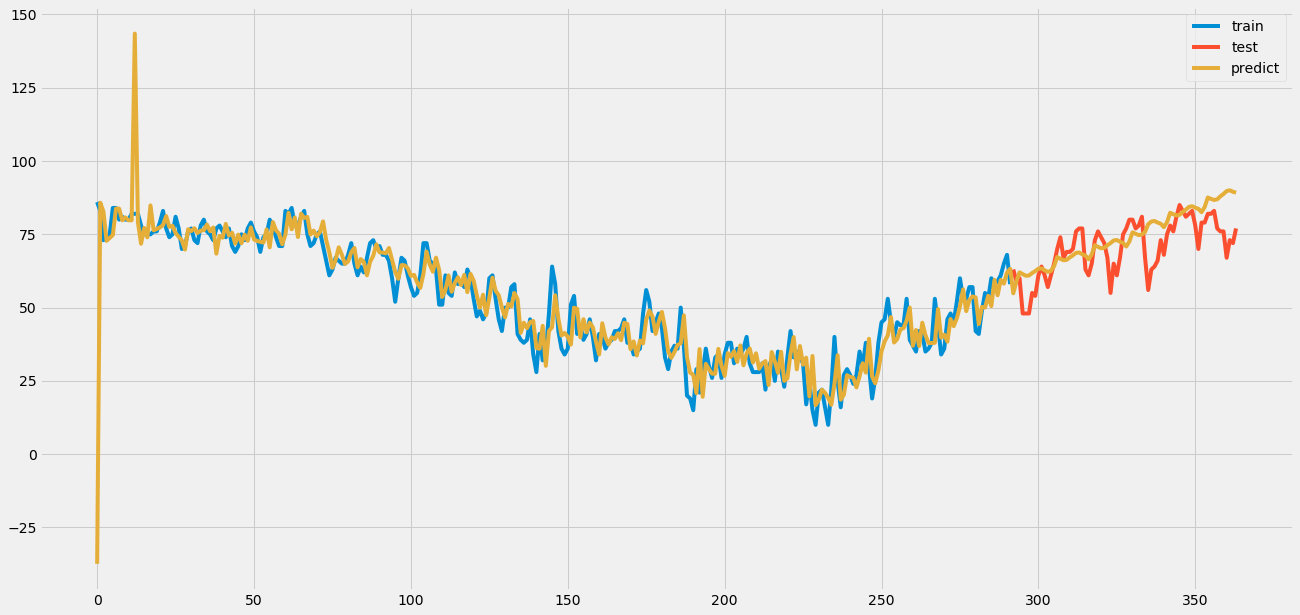

In [4]:
model = ARIMA(analysis)
analysis.run_model(model)

'Train Error: 3.71095890411  Num NaN: 0'

'Test Error: 19.7611111111    Num NaN: 0'

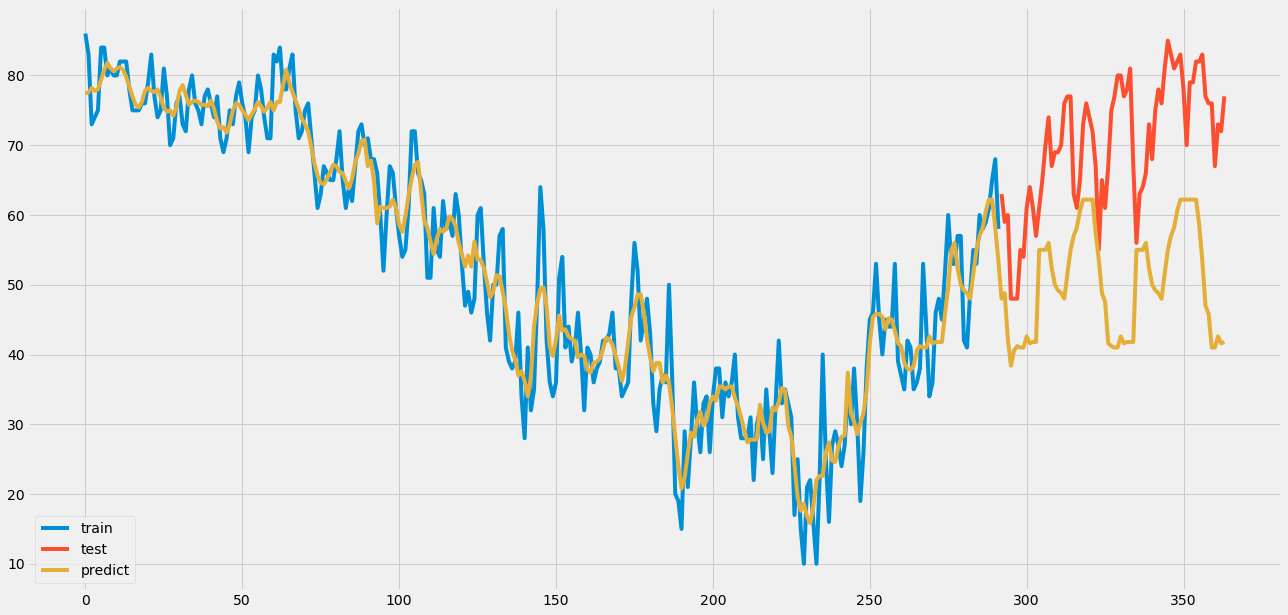

In [5]:
from sklearn.neighbors import KNeighborsRegressor
model = Regressor(analysis, KNeighborsRegressor)
analysis.run_model(model)

//anaconda/envs/python35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


'Train Error: 15.1514418869  Num NaN: 0'

'Test Error: 21.9327089937    Num NaN: 0'

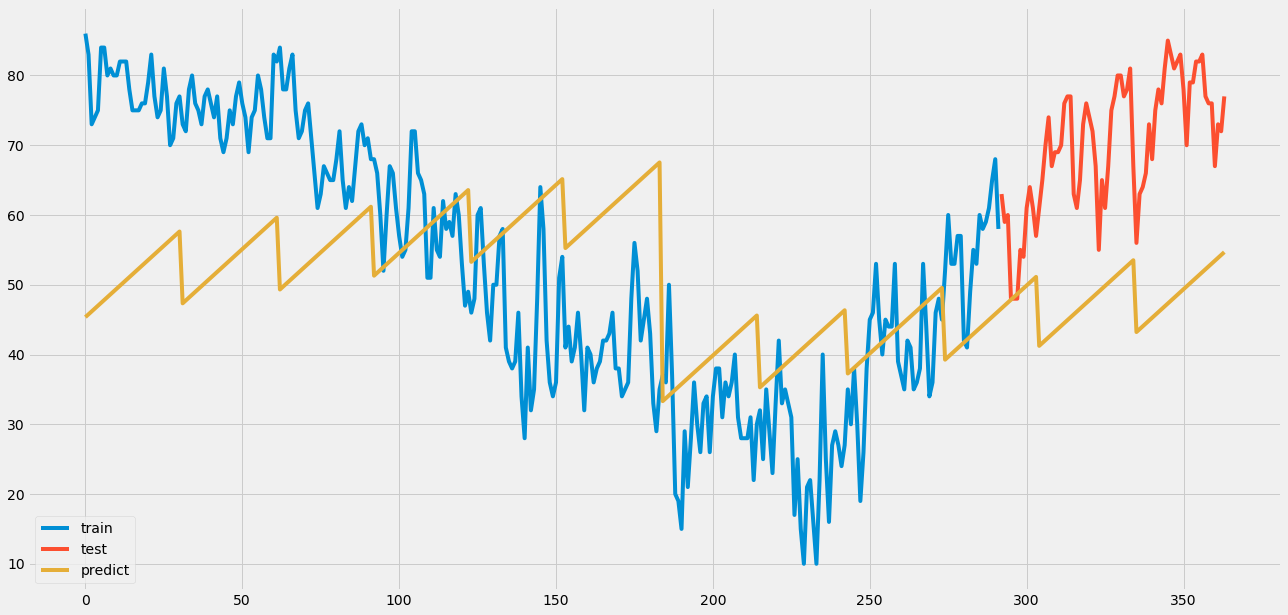

In [6]:
from sklearn.linear_model import SGDRegressor
model = Regressor(analysis, SGDRegressor)
analysis.run_model(model)

'Train Error: 1.58356164384  Num NaN: 0'

'Test Error: 10.1222222222    Num NaN: 0'

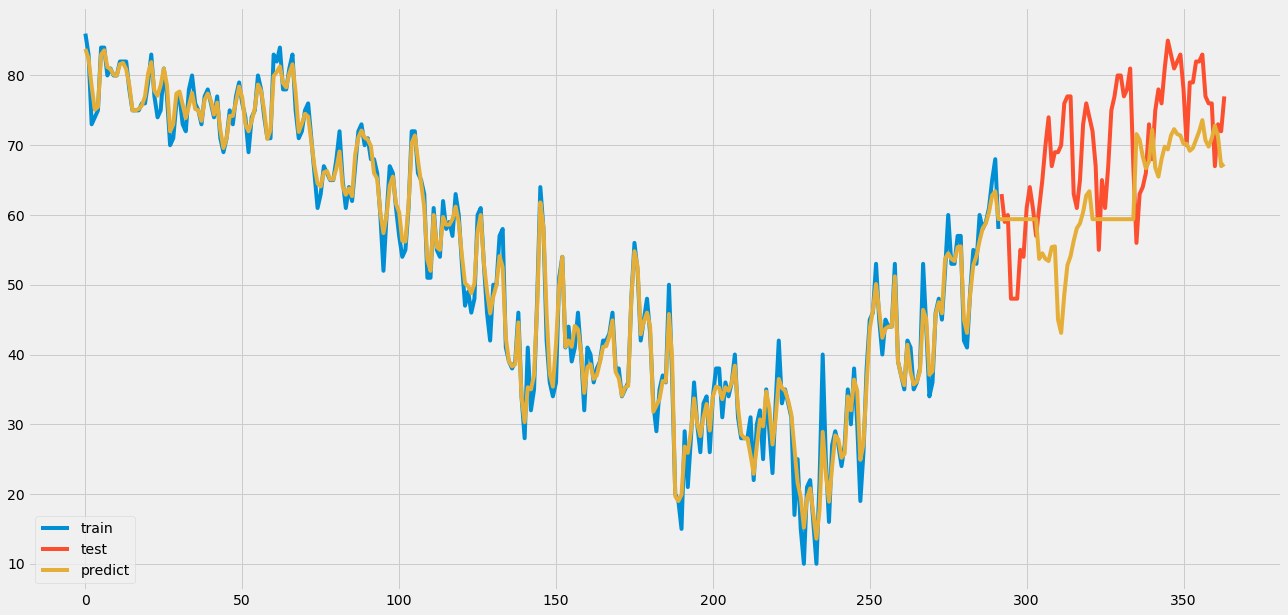

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = Regressor(analysis, RandomForestRegressor)
analysis.run_model(model)

'Train Error: 5.67544809541  Num NaN: 0'

'Test Error: 11.5220206093    Num NaN: 0'

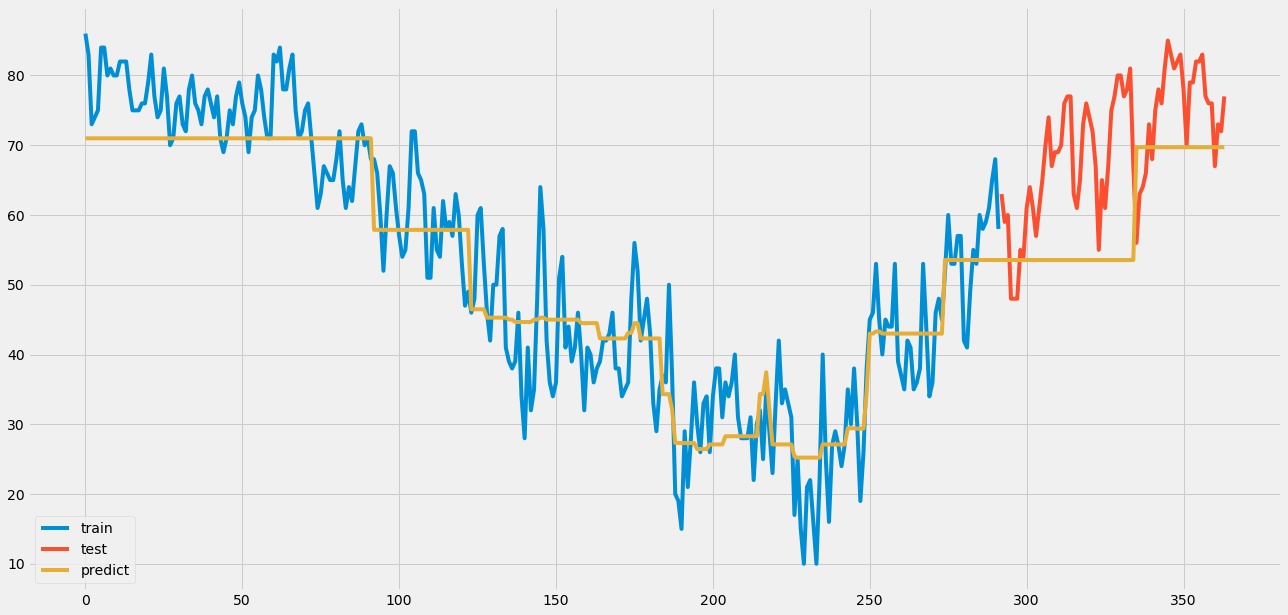

In [8]:
from sklearn.ensemble import AdaBoostRegressor
model = Regressor(analysis, AdaBoostRegressor)
analysis.run_model(model)

'Train Error: 4.26935755063  Num NaN: 0'

'Test Error: 73.3852132161    Num NaN: 0'

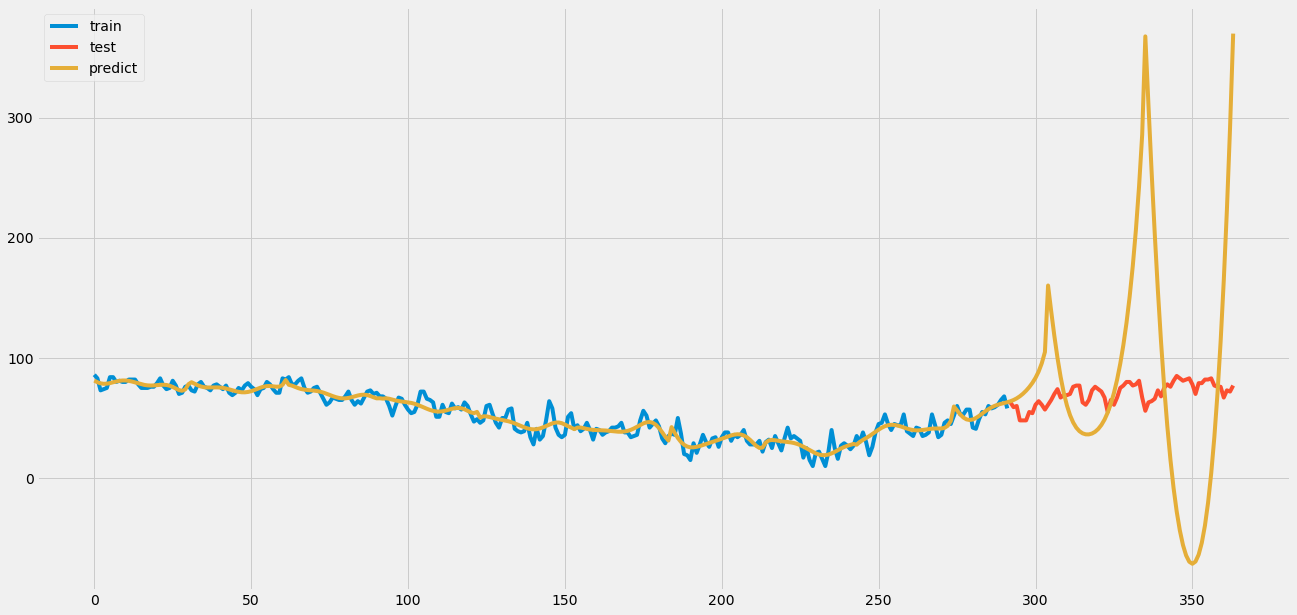

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
model = Regressor(analysis, GaussianProcessRegressor)
analysis.run_model(model)

Now going to use models that require chunking.  We perform chunking by taking the time series:

x = (x0, x1, x2, x3, ...)
y = (x1, x2, x3, x4, ...)

and modifying it such that if the chunk parameter, c, is set to 3:

x = ((x0, x1, x2), (x1, x2, x3), (x2, x3, x4), ...)
y = (x3, x4, x5, ...)

This results in the first c values in not having a prediction and thus (Num NaN is > 0 and == c).



LinearRegression

'Train Error: 9.28226042795  Num NaN: 5'

'Test Error: 50.7158892473    Num NaN: 5'

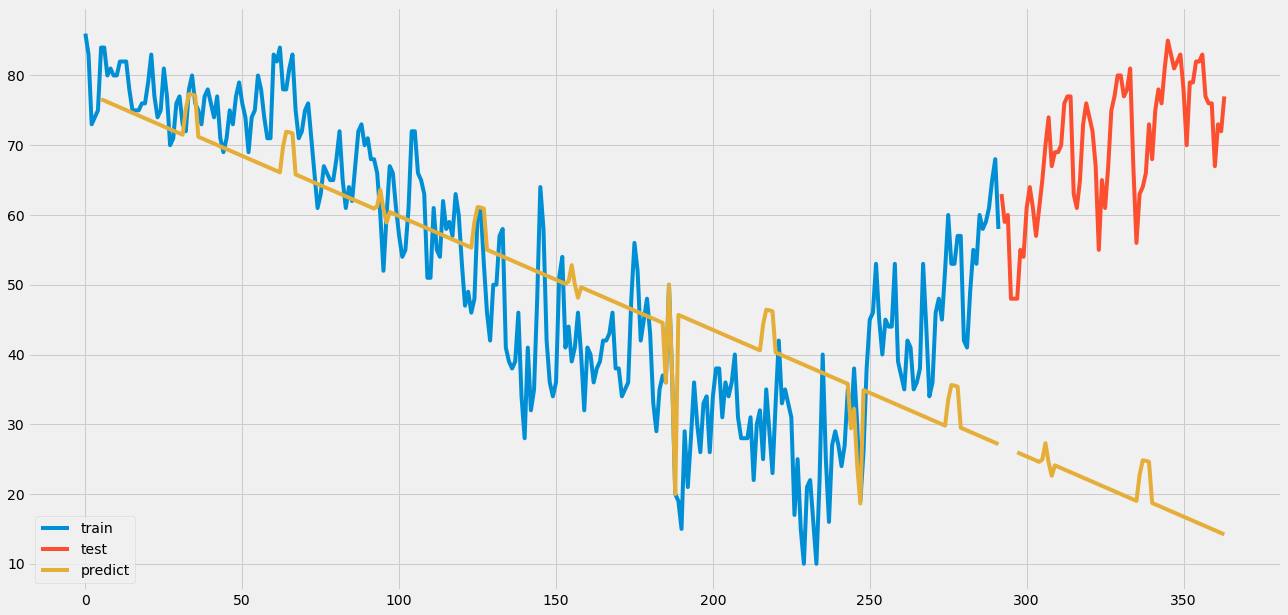

In [10]:
model = LinearRegression(analysis, num_days=NUM_DAYS)
analysis.run_model(model)

FeedForward Neural Network

Using TensorFlow backend.


Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.2743 - val_loss: 0.3982
Epoch 2/10
 - 0s - loss: 0.1728 - val_loss: 0.3619
Epoch 3/10
 - 0s - loss: 0.1674 - val_loss: 0.3789
Epoch 4/10
 - 0s - loss: 0.1663 - val_loss: 0.3569
Epoch 5/10
 - 0s - loss: 0.1637 - val_loss: 0.3391
Epoch 6/10
 - 0s - loss: 0.1593 - val_loss: 0.2971
Epoch 7/10
 - 0s - loss: 0.1574 - val_loss: 0.3308
Epoch 8/10
 - 0s - loss: 0.1547 - val_loss: 0.2976
Epoch 9/10
 - 0s - loss: 0.1538 - val_loss: 0.3573
Epoch 10/10
 - 0s - loss: 0.1510 - val_loss: 0.3204


'Train Error: 11.0981264081  Num NaN: 5'

'Test Error: 24.0324907445    Num NaN: 5'

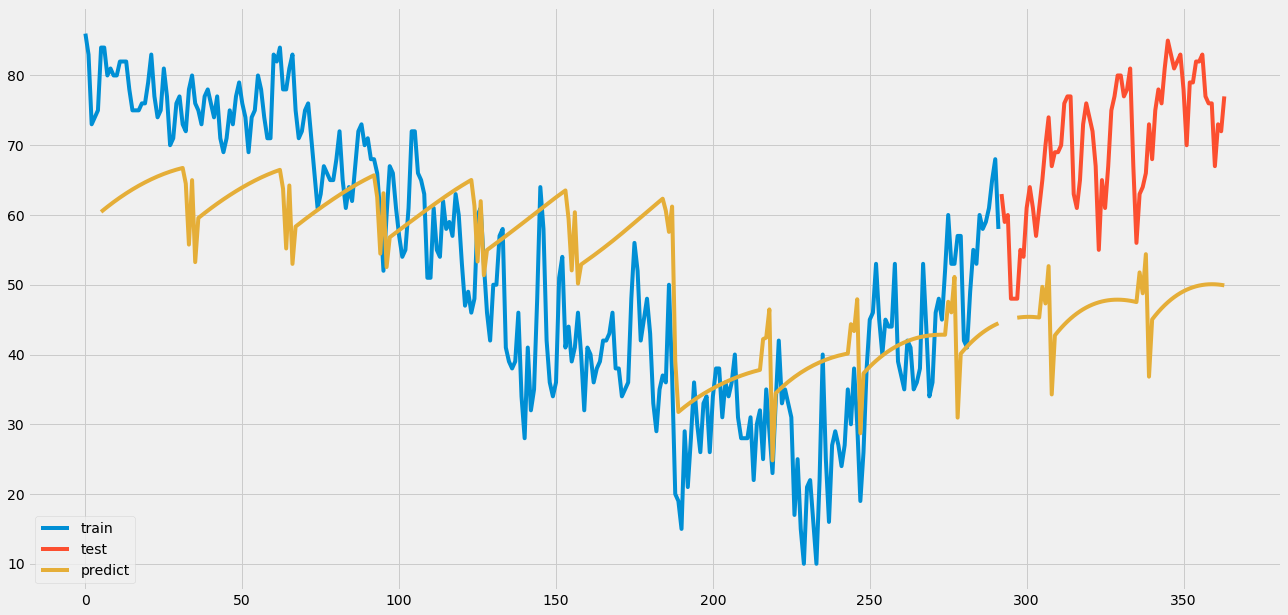

In [11]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

nn = Sequential()
nn.add(layers.Dense(25, activation='tanh',
                    batch_input_shape=(None, NUM_DAYS * NUM_FEATURES)))
nn.add(layers.Dense(10, activation='tanh'))
nn.add(layers.Dense(1, activation='tanh'))
nn.compile(loss='mae', optimizer='sgd')

model = FNN(analysis, nn, num_days=NUM_DAYS)
analysis.run_model(model)


Recurrent Neural Network

Train on 287 samples, validate on 67 samples
Epoch 1/10
 - 0s - loss: 0.2447 - val_loss: 0.3756
Epoch 2/10
 - 0s - loss: 0.2232 - val_loss: 0.2115
Epoch 3/10
 - 0s - loss: 0.2399 - val_loss: 0.1043
Epoch 4/10
 - 0s - loss: 0.2386 - val_loss: 0.3028
Epoch 5/10
 - 0s - loss: 0.2074 - val_loss: 0.1115
Epoch 6/10
 - 0s - loss: 0.2368 - val_loss: 0.4288
Epoch 7/10
 - 0s - loss: 0.2393 - val_loss: 0.4458
Epoch 8/10
 - 0s - loss: 0.2384 - val_loss: 0.1073
Epoch 9/10
 - 0s - loss: 0.2328 - val_loss: 0.0958
Epoch 10/10
 - 0s - loss: 0.2495 - val_loss: 0.1815


'Train Error: 17.1967258653  Num NaN: 5'

'Test Error: 13.6138836875    Num NaN: 5'

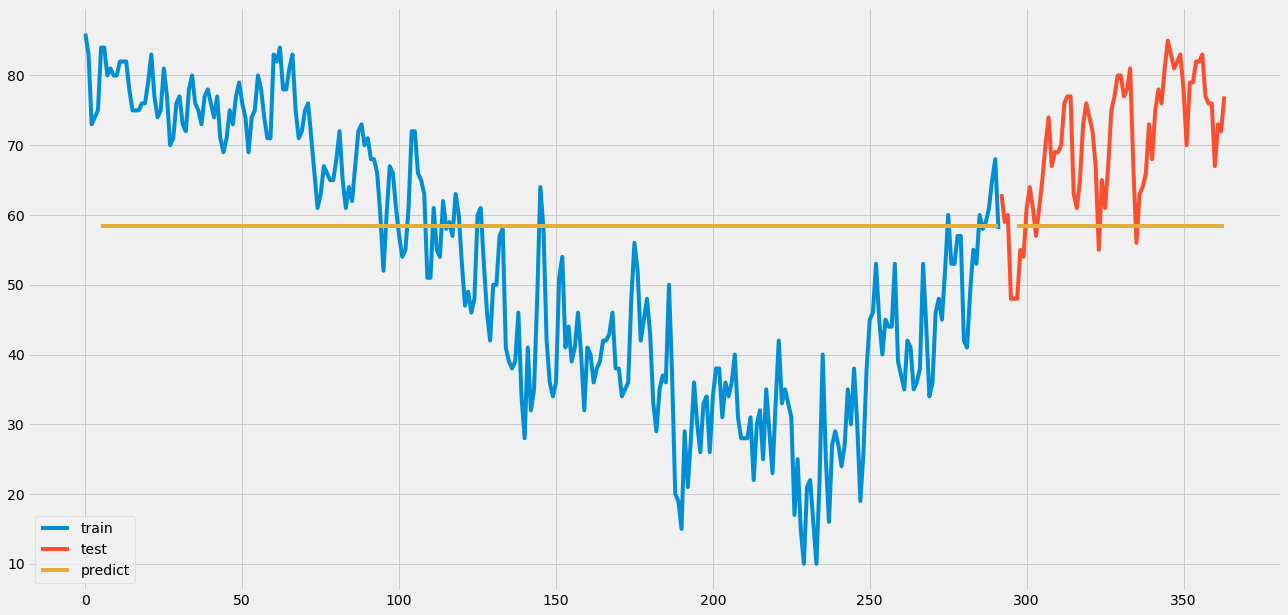

In [12]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.SimpleRNN(50, input_shape=(NUM_DAYS, NUM_FEATURES)))

nn.add(layers.Dense(1, activation='tanh'))
nn.add(layers.Dense(1, activation='linear'))
nn.compile(loss='mae', optimizer=optimizers.RMSprop(lr=0.1))
        
model = RNNSingle(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

LSTM Network

In [13]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(NUM_DAYS, NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(NUM_DAYS, NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNMultiple(analysis, nn, num_days=NUM_DAYS, mask_value=mask_value)
analysis.run_model(model)

Train on 59 samples, validate on 15 samples
Epoch 1/10
 - 1s - loss: 1.0015 - val_loss: 0.8762
Epoch 2/10
 - 0s - loss: 0.8371 - val_loss: 0.7432
Epoch 3/10
 - 0s - loss: 0.7216 - val_loss: 0.6163
Epoch 4/10
 - 0s - loss: 0.6070 - val_loss: 0.4935
Epoch 5/10
 - 0s - loss: 0.4966 - val_loss: 0.3888
Epoch 6/10
 - 0s - loss: 0.4025 - val_loss: 0.3111
Epoch 7/10
 - 0s - loss: 0.3306 - val_loss: 0.2566
Epoch 8/10
 - 0s - loss: 0.2773 - val_loss: 0.2164
Epoch 9/10
 - 0s - loss: 0.2368 - val_loss: 0.1858
Epoch 10/10
 - 0s - loss: 0.2054 - val_loss: 0.1607


IndexError: index 295 is out of bounds for axis 1 with size 295

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras import layers

mask_value = -9999

nn = Sequential()
nn.add(layers.Masking(mask_value=mask_value, input_shape=(len(analysis.x_train), NUM_FEATURES)))
nn.add(layers.LSTM(50, activation='tanh', input_shape=(len(analysis.x_train), NUM_FEATURES), return_sequences=True))

nn.add(layers.TimeDistributed(layers.Dense(10, activation='relu')))
nn.add(layers.TimeDistributed(layers.Dense(1, activation='tanh')))
# nn.add(layers.TimeDistributed(layers.Dense(1, activation='linear')))
nn.compile(loss='mae', optimizer='rmsprop')

model = RNNAll(analysis, nn, mask_value=mask_value)
analysis.run_model(model)